In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_t = pd.read_csv('data/t_sample.csv')
df_f = pd.read_csv('data/f_sample.csv')

In [3]:
df_t['date'] = pd.to_datetime(df_t['date'], errors='coerce')
df_f['date'] = pd.to_datetime(df_f['date'], errors='coerce')

In [4]:
data = pd.concat([df_t, df_f],axis=0).reset_index()
data

,index,title,text,subject,date,type,text_processed
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,"['washington', 'reuter', 'head', 'conserv', 'r..."
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1,"['washington', 'reuter', 'transgend', 'peopl',..."
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,"['washington', 'reuter', 'special', 'counsel',..."
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1,"['washington', 'reuter', 'trump', 'campaign', ..."
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1,"['seattl', 'washington', 'reuter', 'presid', '..."
...,...,...,...,...,...,...,...
44043,22833,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,0,"['st', 'centuri', 'wire', 'say', 'wire', 'repo..."
44044,22834,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,0,"['st', 'centuri', 'wire', 'say', 'familiar', '..."
44045,22835,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,0,"['patrick', 'henningsen', 'st', 'centuri', 'wi..."
44046,22836,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,0,"['st', 'centuri', 'wire', 'say', 'jazeera', 'a..."


In [5]:
data = data.drop(['index'], axis=1)

In [6]:
data.head()

,title,text,subject,date,type,text_processed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,"['washington', 'reuter', 'head', 'conserv', 'r..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1,"['washington', 'reuter', 'transgend', 'peopl',..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,"['washington', 'reuter', 'special', 'counsel',..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1,"['washington', 'reuter', 'trump', 'campaign', ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1,"['seattl', 'washington', 'reuter', 'presid', '..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44048 entries, 0 to 44047
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           44048 non-null  object        
 1   text            44048 non-null  object        
 2   subject         44048 non-null  object        
 3   date            44048 non-null  datetime64[ns]
 4   type            44048 non-null  int64         
 5   text_processed  44048 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.0+ MB


In [8]:
data.isna().sum()

title             0
text              0
subject           0
date              0
type              0
text_processed    0
dtype: int64

In [9]:
data['text_processed'].head(10)

0    ['washington', 'reuter', 'head', 'conserv', 'r...
1    ['washington', 'reuter', 'transgend', 'peopl',...
2    ['washington', 'reuter', 'special', 'counsel',...
3    ['washington', 'reuter', 'trump', 'campaign', ...
4    ['seattl', 'washington', 'reuter', 'presid', '...
5    ['west', 'palm', 'beach', 'fla', 'washington',...
6    ['west', 'palm', 'beach', 'fla', 'reuter', 'pr...
7    ['follow', 'statement', 'post', 'verifi', 'twi...
8    ['follow', 'statement', 'post', 'verifi', 'twi...
9    ['washington', 'reuter', 'alabama', 'secretari...
Name: text_processed, dtype: object

In [10]:
data['type'].value_counts()

0    22838
1    21210
Name: type, dtype: int64

In [11]:
data['type'].value_counts(dropna = False).index

Int64Index([0, 1], dtype='int64')

### Check balance target

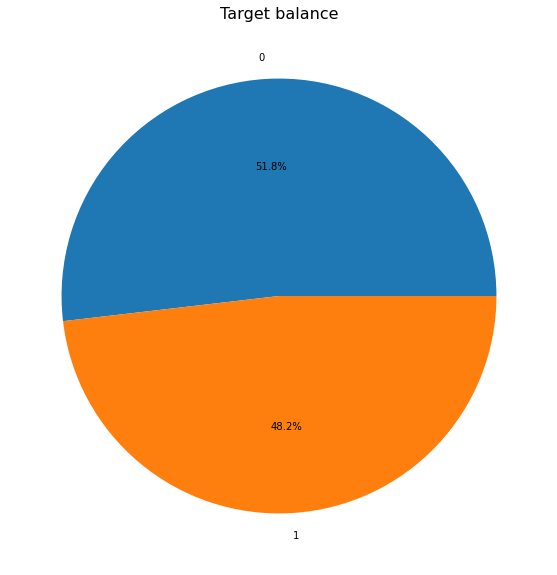

In [12]:
data['type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10));
plt.title('Target balance', size=16)
plt.ylabel('')
plt.show()

### by subject

In [13]:
data['subject'].value_counts()

politicsNews       11219
worldnews           9991
News                9050
politics            6425
left-news           4306
Government News     1496
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

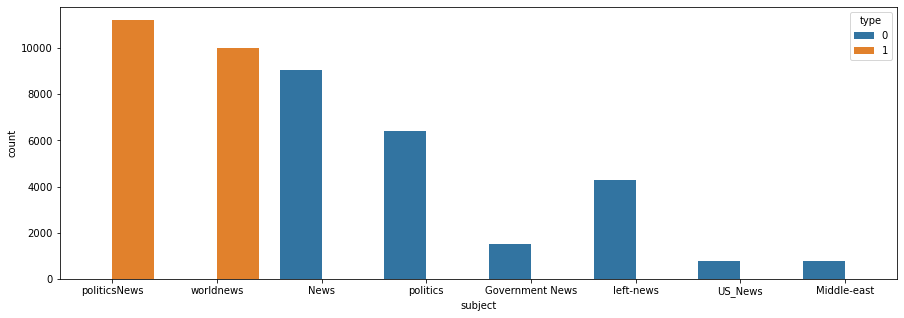

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='subject', data=data, hue='type');

### Top words in real news

In [15]:
df_t.head(3)

,title,text,subject,date,type,text_processed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,"['washington', 'reuter', 'head', 'conserv', 'r..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1,"['washington', 'reuter', 'transgend', 'peopl',..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,"['washington', 'reuter', 'special', 'counsel',..."


In [16]:
type(df_t['text_processed'][0])

str

In [17]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21210 entries, 0 to 21209
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           21210 non-null  object        
 1   text            21210 non-null  object        
 2   subject         21210 non-null  object        
 3   date            21210 non-null  datetime64[ns]
 4   type            21210 non-null  int64         
 5   text_processed  21210 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 994.3+ KB


In [18]:
def get_w(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
part = get_w(df_t.text_processed)

In [19]:
from collections import Counter

counter = Counter(part)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{"'said',": 95795,
 "'trump',": 54072,
 "'wa',": 47399,
 "'hi',": 37565,
 "'state',": 37282,
 "'would',": 31238,
 "'presid',": 29703,
 "'reuter',": 27086,
 "'republican',": 22844,
 "'year',": 22121}

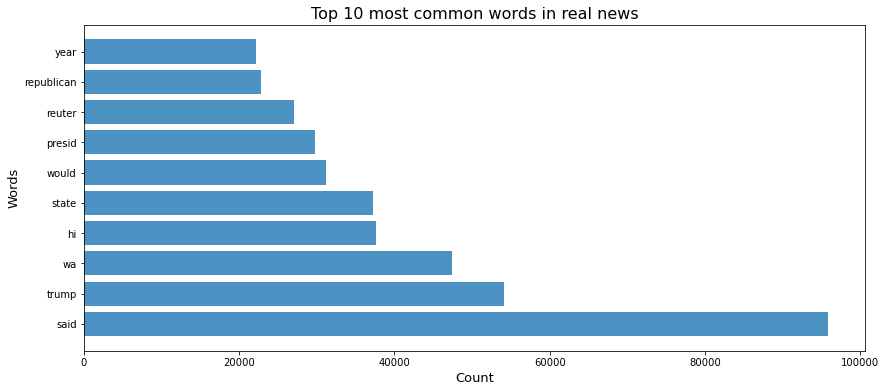

In [21]:
locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
heights = [95795, 54072, 47399, 37565, 37282, 31238, 29703, 27086, 22844, 22121]
labels = ['said', 'trump', 'wa', 'hi', 'state', 'would', 'presid', 'reuter', 'republican', 'year']
plt.barh(locations, heights, tick_label = labels, alpha = .8);
plt.title('Top 10 most common words in real news', size=16);
plt.xlabel('Count', size=13);
plt.ylabel('Words', size=13);


rcParams['figure.figsize'] = 14,6

### Top words in fake news

In [22]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22838 entries, 0 to 22837
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           22838 non-null  object        
 1   text            22838 non-null  object        
 2   subject         22838 non-null  object        
 3   date            22838 non-null  datetime64[ns]
 4   type            22838 non-null  int64         
 5   text_processed  22838 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.0+ MB


In [23]:
fake_w = get_w(df_f.text_processed)

In [24]:
counter_f = Counter(fake_w)
most_common_f = counter_f.most_common(10)
most_common_f = dict(most_common_f)
most_common_f

{"'trump',": 79690,
 "'wa',": 67779,
 "'hi',": 58434,
 "'said',": 33691,
 "'presid',": 29994,
 "'peopl',": 26564,
 "'state',": 25395,
 "'would',": 23505,
 "'like',": 21870,
 "'say',": 20919}

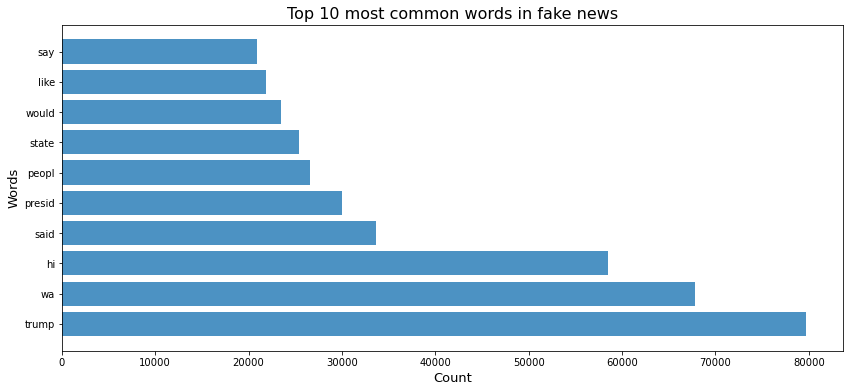

In [25]:
locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
heights = [79690, 67779, 58434, 33691, 29994, 26564, 25395, 23505, 21870, 20919]
labels = ['trump', 'wa', 'hi', 'said', 'presid', 'peopl', 'state', 'would', 'like', 'say']
plt.barh(locations, heights, tick_label = labels, alpha = .8);
plt.title('Top 10 most common words in fake news', size=16);
plt.xlabel('Count', size=13);
plt.ylabel('Words', size=13);

rcParams['figure.figsize'] = 14,6

In [27]:
unique_words_t = set()
for t in df_t.text_processed:
    if t not in unique_words_t:
        unique_words_t.add(t)
print('Number of uniques words in real news texts:  ', len(unique_words_t))

Number of uniques words in real news texts:   20921


In [28]:
unique_words_f = set()
for t in df_f.text_processed:
    if t not in unique_words_f:
        unique_words_f.add(t)
print('Number of uniques words in fake news texts:  ', len(unique_words_f))

Number of uniques words in fake news texts:   17391


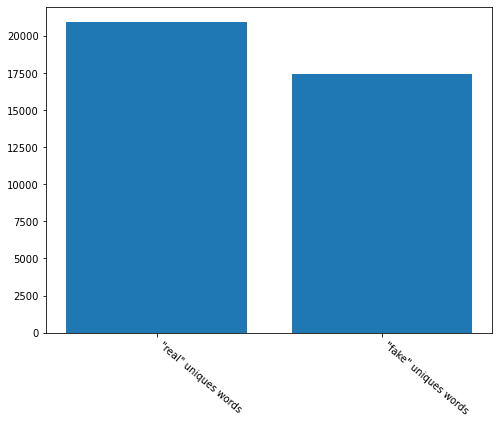

In [31]:
plt.bar([1,2],[20921, 17391], tick_label= ['real news', 'fake news']);
plt.xticks(rotation = "-40", ha = 'left');
plt.title('The number of unique words', size=16);
rcParams['figure.figsize'] = 8,4

### Create a column `text_length`

In [33]:
data['text_length'] = [len(w.split()) for w in data.text_processed]
data

,title,text,subject,date,type,text_processed,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,"['washington', 'reuter', 'head', 'conserv', 'r...",420
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1,"['washington', 'reuter', 'transgend', 'peopl',...",374
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,"['washington', 'reuter', 'special', 'counsel',...",267
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1,"['washington', 'reuter', 'trump', 'campaign', ...",235
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1,"['seattl', 'washington', 'reuter', 'presid', '...",484
...,...,...,...,...,...,...,...
44043,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,0,"['st', 'centuri', 'wire', 'say', 'wire', 'repo...",317
44044,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,0,"['st', 'centuri', 'wire', 'say', 'familiar', '...",161
44045,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,0,"['patrick', 'henningsen', 'st', 'centuri', 'wi...",2283
44046,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,0,"['st', 'centuri', 'wire', 'say', 'jazeera', 'a...",248


### Show average text length of _real_ news 

In [39]:
df1 = data.query('type == 1')

In [36]:
round(df1['text_length'].mean(),2)

225.79

### Show average text length of _fake_ news 

In [37]:
df0 = data.query('type == 0')

In [38]:
round(df0['text_length'].mean(),2)

242.57

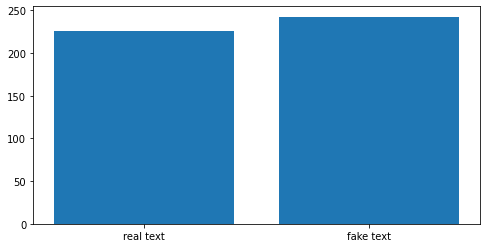

In [59]:
plt.bar([1,2],[225.79, 242.57], tick_label= ['real text' , 'fake text']);
rcParams['figure.figsize'] = 8,4

### Distribution of average word length in each text

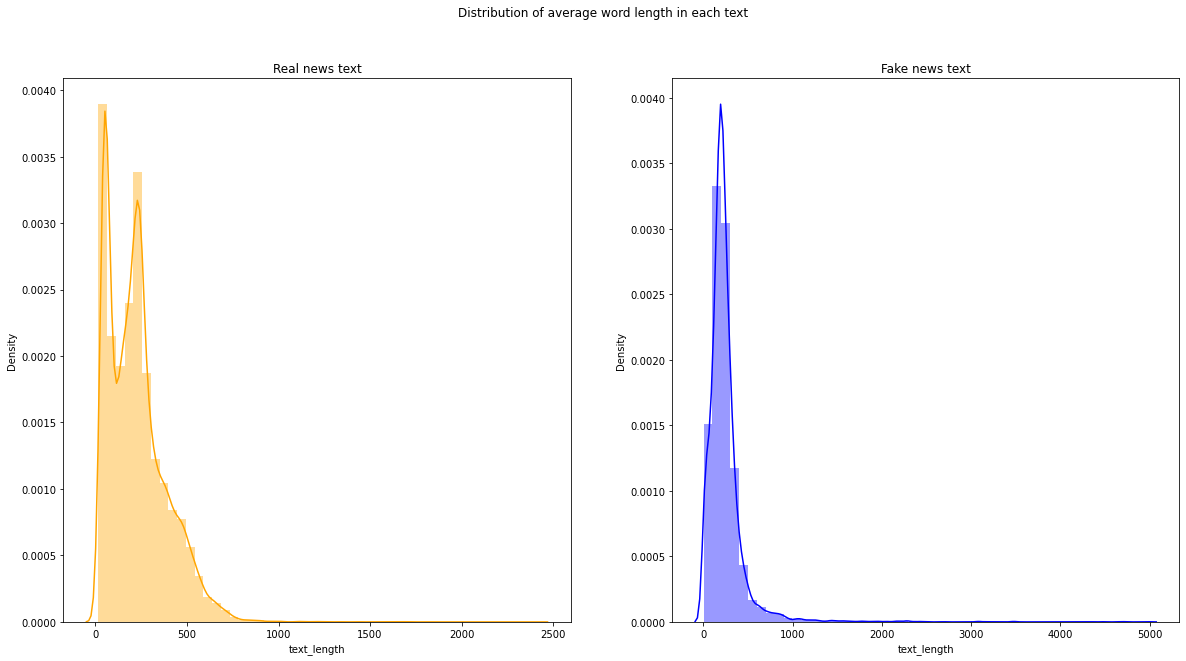

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=data.query('type == 1')['text_length']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='orange')
ax1.set_title('Real news text')
word=data.query('type == 0')['text_length']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Fake news text')
fig.suptitle('Distribution of average word length in each text');

### N-gram analysis

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(body, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(body)
    bag_of_words = vec.transform(body)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

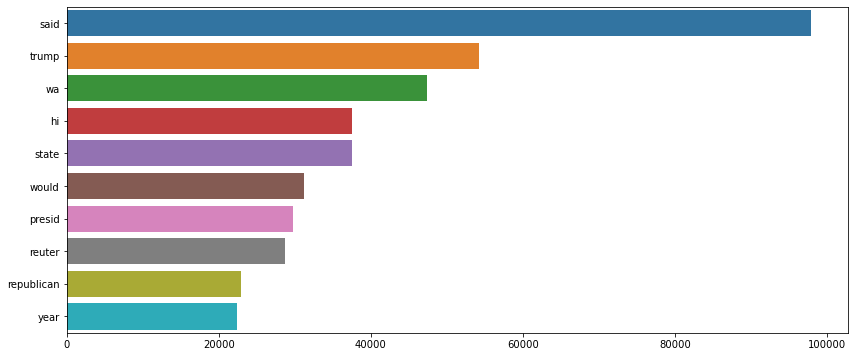

In [48]:
plt.figure(figsize = (14,6))
most_common_uni = get_ngrams(df_t['text_processed'], 10, 1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()));

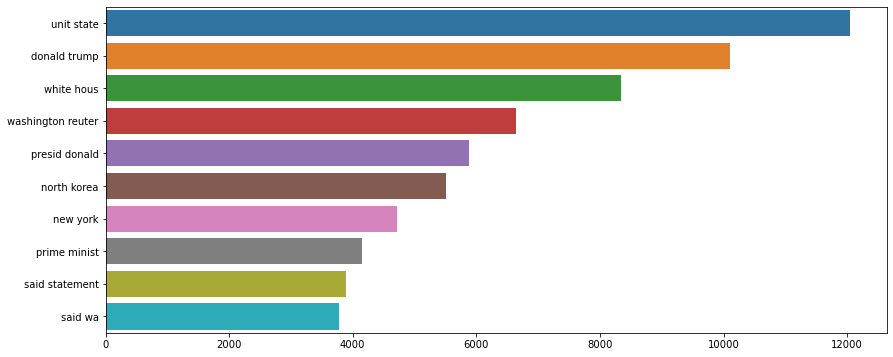

In [51]:
plt.figure(figsize = (14,6))
most_common_bi = get_ngrams(df_t['text_processed'], 10, 2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()), y=list(most_common_bi.keys()));

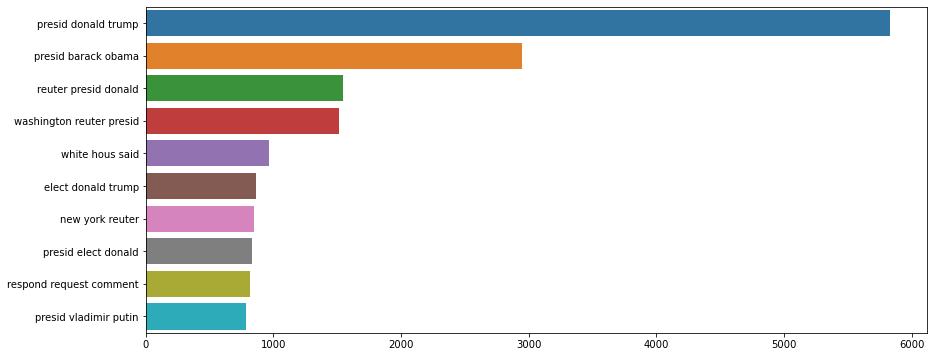

In [54]:
plt.figure(figsize = (14,6))
most_common_3 = get_ngrams(df_t['text_processed'], 10,3)
most_common_3 = dict(most_common_3)
sns.barplot(x=list(most_common_3.values()), y=list(most_common_3.keys()));

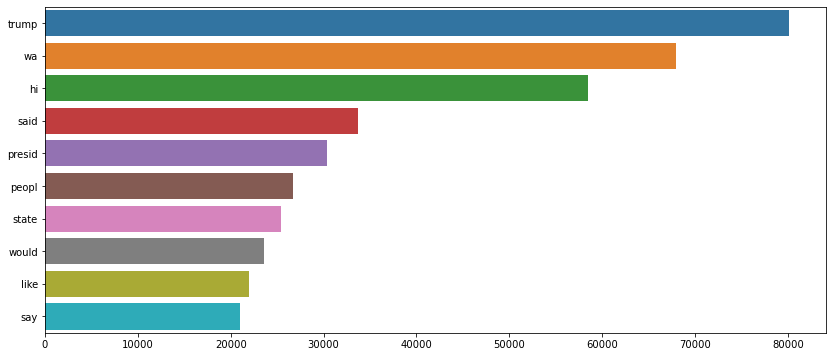

In [55]:
plt.figure(figsize = (14,6))
most_common_uni = get_ngrams(df_f['text_processed'], 10, 1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()));

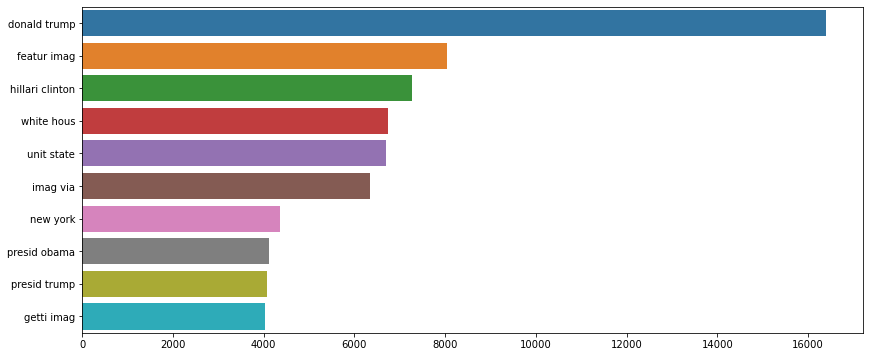

In [56]:
plt.figure(figsize = (14,6))
most_common_bi = get_ngrams(df_f['text_processed'], 10, 2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()), y=list(most_common_bi.keys()));

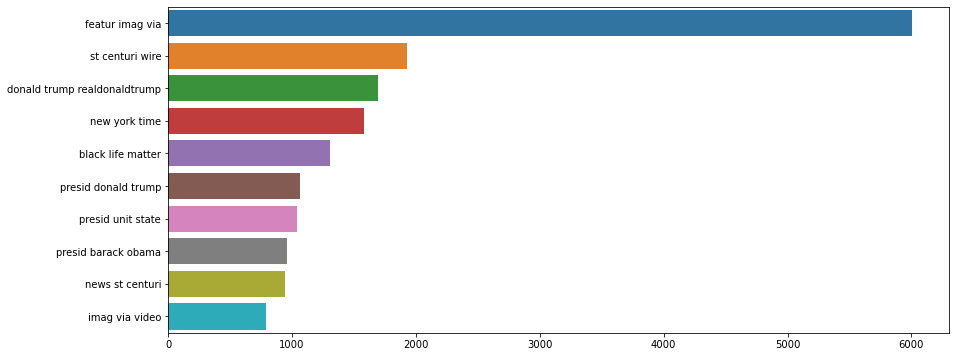

In [57]:
plt.figure(figsize = (14,6))
most_common_3 = get_ngrams(df_f['text_processed'], 10,3)
most_common_3 = dict(most_common_3)
sns.barplot(x=list(most_common_3.values()), y=list(most_common_3.keys()));

In [60]:
data.to_csv('data2.csv', index=False)